# Project on Logistic Regression Model

## What is Logistic Regression

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable

#### Project Dataset
Framingham Heart study dataset 


Importing few Libraries for the project 

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import pandas_profiling

In [2]:
# Here I'm setting the working directory
os.chdir(r'E:\mine\Data Mining\project\log reg') 
os.getcwd()

'E:\\mine\\Data Mining\\project\\log reg'

In [3]:
#Here I'm reading the Dataset
dflog=pd.read_csv('framinghamdata.csv',na_values='NA')

In [4]:
# this is the dimension of my dataset
dflog.shape

(4240, 16)

In [5]:
# the description of my Dataset
dflog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [6]:
#Column Names for easy refernces
dflog.columns

Index(['Gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [7]:
dflog.head()

Gender  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0       1   39        4.0              0         0.0     0.0                0   
1       0   46        2.0              0         0.0     0.0                0   
2       1   48        1.0              1        20.0     0.0                0   
3       0   61        3.0              1        30.0     0.0                0   
4       0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [8]:
dflog.tail()

Gender  age  education  currentSmoker  cigsPerDay  BPMeds  \
4235       0   48        2.0              1        20.0     NaN   
4236       0   44        1.0              1        15.0     0.0   
4237       0   52        2.0              0         0.0     0.0   
4238       1   40        3.0              0         0.0     0.0   
4239       0   39        3.0              1        30.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
4235                0             0         0    248.0  131.0   72.0  22.00   
4236                0             0         0    210.0  126.5   87.0  19.16   
4237                0             0         0    269.0  133.5   83.0  21.47   
4238                0             1         0    185.0  141.0   98.0  25.60   
4239                0             0         0    196.0  133.0   86.0  20.91   

      heartRate  glucose  TenYearCHD  
4235       84.0     86.0           0  
4236       86.0      NaN           0  
4237       80.0    107.0           0  
4238       67.0     72.0           0  
4239       85.0     80.0           0

In [9]:
dflog.astype('object').describe().transpose()

count  unique     top    freq
Gender           4240.0     2.0    0.00  2420.0
age              4240.0    39.0   40.00   192.0
education        4135.0     4.0    1.00  1720.0
currentSmoker    4240.0     2.0    0.00  2145.0
cigsPerDay       4211.0    33.0    0.00  2145.0
BPMeds           4187.0     2.0    0.00  4063.0
prevalentStroke  4240.0     2.0    0.00  4215.0
prevalentHyp     4240.0     2.0    0.00  2923.0
diabetes         4240.0     2.0    0.00  4131.0
totChol          4190.0   248.0  240.00    85.0
sysBP            4240.0   234.0  120.00   107.0
diaBP            4240.0   146.0   80.00   262.0
BMI              4221.0  1364.0   22.54    18.0
heartRate        4239.0    73.0   75.00   563.0
glucose          3852.0   143.0   75.00   193.0
TenYearCHD       4240.0     2.0    0.00  3596.0

In [10]:
dflog.describe().T

count        mean        std     min     25%    50%     75%  \
Gender           4240.0    0.429245   0.495027    0.00    0.00    0.0    1.00   
age              4240.0   49.580189   8.572942   32.00   42.00   49.0   56.00   
education        4135.0    1.979444   1.019791    1.00    1.00    2.0    3.00   
currentSmoker    4240.0    0.494104   0.500024    0.00    0.00    0.0    1.00   
cigsPerDay       4211.0    9.005937  11.922462    0.00    0.00    0.0   20.00   
BPMeds           4187.0    0.029615   0.169544    0.00    0.00    0.0    0.00   
prevalentStroke  4240.0    0.005896   0.076569    0.00    0.00    0.0    0.00   
prevalentHyp     4240.0    0.310613   0.462799    0.00    0.00    0.0    1.00   
diabetes         4240.0    0.025708   0.158280    0.00    0.00    0.0    0.00   
totChol          4190.0  236.699523  44.591284  107.00  206.00  234.0  263.00   
sysBP            4240.0  132.354599  22.033300   83.50  117.00  128.0  144.00   
diaBP            4240.0   82.897759  11.910394   48.00   75.00   82.0   90.00   
BMI              4221.0   25.800801   4.079840   15.54   23.07   25.4   28.04   
heartRate        4239.0   75.878981  12.025348   44.00   68.00   75.0   83.00   
glucose          3852.0   81.963655  23.954335   40.00   71.00   78.0   87.00   
TenYearCHD       4240.0    0.151887   0.358953    0.00    0.00    0.0    0.00   

                   max  
Gender             1.0  
age               70.0  
education          4.0  
currentSmoker      1.0  
cigsPerDay        70.0  
BPMeds             1.0  
prevalentStroke    1.0  
prevalentHyp       1.0  
diabetes           1.0  
totChol          696.0  
sysBP            295.0  
diaBP            142.5  
BMI               56.8  
heartRate        143.0  
glucose          394.0  
TenYearCHD         1.0

In [11]:
# I am using pandas profiling for exploratory data analysis

from pandas_profiling import ProfileReport

pandas_profiling.ProfileReport(dflog)

Attributes:

After looking at the pandas profiling report, we can say we have three types of attributes in our data:

1)NOMINAL:

sex: Male(1) or Female(0)
currentSmoker: Whether the paitent is smoker or not. Yes(1) and No(0)
BPMeds: Whether the paitent was on blood pressure medications. Yes(1) and No(0)
prevalentStroke: Whether the paitent had a stroke before. Yes(1) and No(0)
prevalentHyp: Whether the paitent has history of Hypertension. Yes(1) and No(0)
diabetes: Whether the paitent has diabetes. Yes(1) and No(0)

TenYearCHD: This is our target variable which we will be predicting. Yes(1) and No(0)

2)ORDINAL:

education: Defined in classes 1-4. Tells us how much our paitent is educated.

3)CONTINIOUS:

age: Contains ages of our paitents in whole numbers.
cigsPerDay: Contains the average of cigarettes smoked by the paitents in one day.
totChol: Contains total cholestrol level of each paitent.
sysBP: Contains systolic blood pressure levels of each paitent.
diaBP: Contains diastolic blood pressure levels of each paitent.
BMI: Contains body mass index of each paitent.
heartRate: Contains the average heart rate of the paitent.
glucose: Contains the glucose level of each paitent.
Data Manipulation
After carefully understanding our dataset, we can say education does not affect someone's risk of heart diseases. Hence it would be okay if we remove that column.

From the pandas-profiling report we conclude that:

totChol, sysBP, diaBP and BMI has a uniform distribution and the rest are unevenly distributed.
cigsPerDay has a highly uneven distribution with the most data present in 0.
cigsPerDay and sysBP is slightly right skewed.

In [ ]:
# looking for Missing values

In [13]:
dflog.isna().sum()

Gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

#### Since we have missing values we are using Mode and median for filling the values for the columns.

In [36]:
#Here missing values are filled 
#We will fill the missing values in numeric columns with the median
#and fill the missing values categorical column with the most freq

data = dflog.fillna(
            {
                'education': dflog.education.mode()[0],
                'cigsPerDay': dflog.cigsPerDay.mode()[0],
                'BPMeds': dflog.BPMeds.mode()[0],
                'totChol': dflog.totChol.median(),
                'BMI': dflog.BMI.median(),
                'heartRate': dflog.heartRate.median(),
                'glucose': dflog.glucose.median()
                },
    inplace = True
         )

In [37]:
#this below table shows no missing values anymore
dflog.isna().sum()

Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [38]:
dflog.TenYearCHD.value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

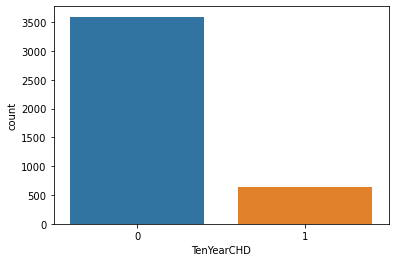

In [39]:
import seaborn as sn
sn.countplot(x='TenYearCHD',data=dflog)


#### In the next step I'mm extracting the dependent and independent variables and also dropping education as it does not play any important role in heart attack predication 

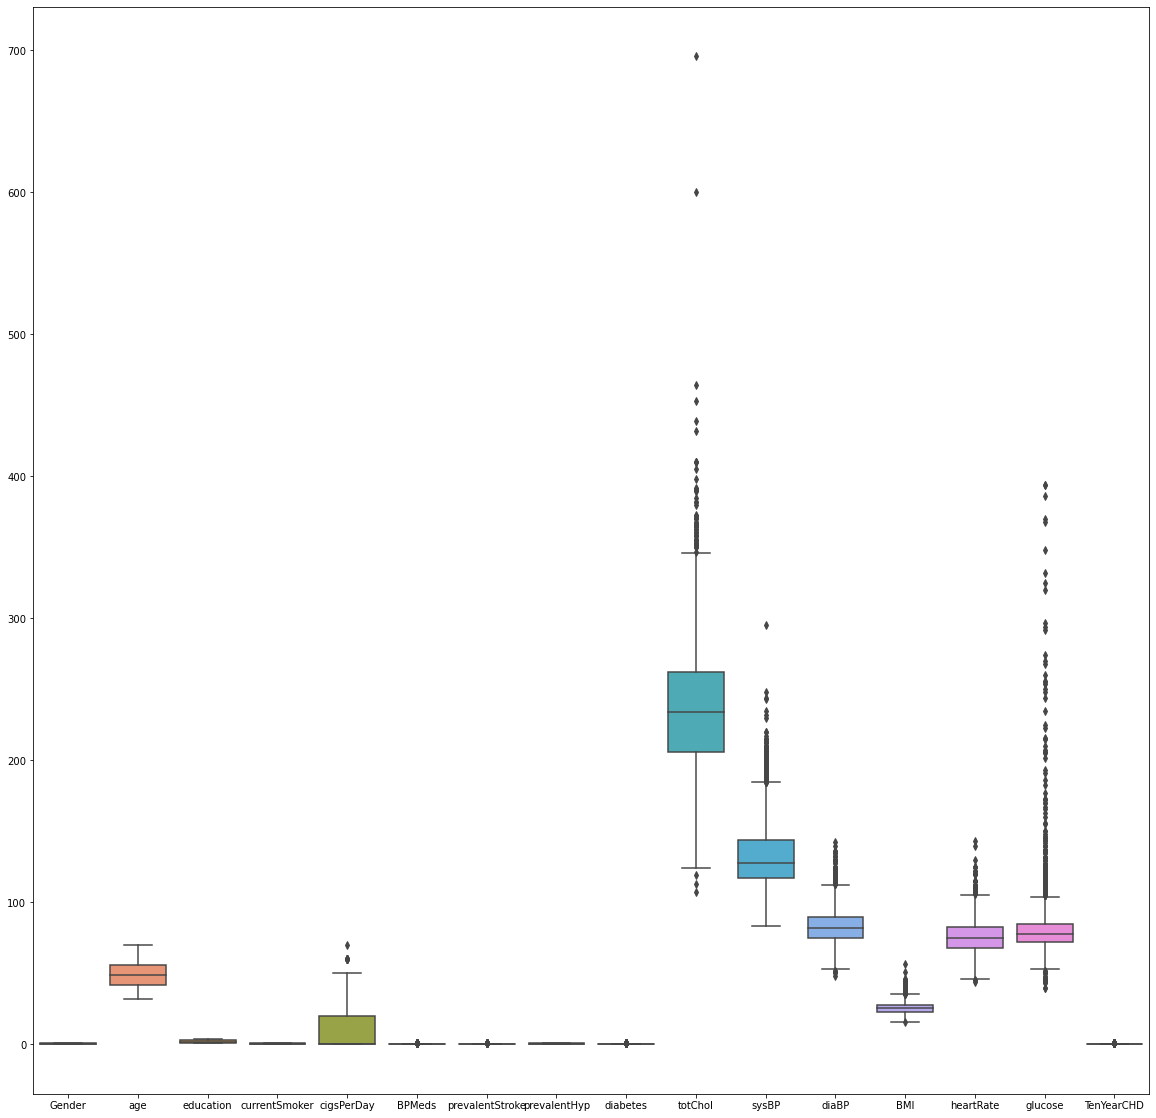

In [40]:
# To check for outliers, we are plotting a box-whisker plot.
import matplotlib.pyplot      as plt
import seaborn                as sns
plt.figure(figsize=(20,20), facecolor='w')
sns.boxplot(data=dflog)
plt.show()

From the generated boxplot we can conclude:

1.We have outliers in the following columns: cigsPerDay, totChol, sysBP, diaBP, BMI, heartRate, glucose
2.Out of them we have extremities in 'totChol' and 'sysBP' the rest of the outliers are close to the upper whisker which are considerable.

In [41]:
#shuffling the dataset for proper sampling

dflog = dflog.sample(frac = 1, random_state=1)

In [42]:
#Extracting the X and y variables
X = dflog.drop(['TenYearCHD','education'],axis=1)
y=dflog.TenYearCHD
X.head()


Gender  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
3077       0   67              0         0.0     0.0                0   
315        0   46              1        30.0     0.0                0   
2195       1   45              1        25.0     0.0                0   
2691       1   58              1        20.0     0.0                0   
1914       1   62              1        20.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  
3077             0         0    223.0  111.0   73.0  27.89       90.0     63.0  
315              0         0    219.0  107.0   69.0  21.40       66.0     78.0  
2195             0         0    288.0  124.0   81.0  27.94       69.0    118.0  
2691             0         0    207.0  110.0   80.0  23.55       78.0     78.0  
1914             0         0    300.0  108.0   73.0  20.87       60.0     80.0

In [43]:
y.head()

3077    1
315     0
2195    0
2691    0
1914    0
Name: TenYearCHD, dtype: int64

In [44]:
X.corr()

Gender       age  currentSmoker  cigsPerDay    BPMeds  \
Gender           1.000000 -0.029014       0.197026    0.314849 -0.051544   
age             -0.029014  1.000000      -0.213662   -0.192017  0.121011   
currentSmoker    0.197026 -0.213662       1.000000    0.760326 -0.048348   
cigsPerDay       0.314849 -0.192017       0.760326    1.000000 -0.044697   
BPMeds          -0.051544  0.121011      -0.048348   -0.044697  1.000000   
prevalentStroke -0.004550  0.057679      -0.032980   -0.032248  0.114614   
prevalentHyp     0.005853  0.306799      -0.103710   -0.065541  0.258580   
diabetes         0.015693  0.101314      -0.044285   -0.036173  0.051407   
totChol         -0.069643  0.260527      -0.046391   -0.027134  0.078642   
sysBP           -0.035879  0.394053      -0.130281   -0.088393  0.251479   
diaBP            0.058199  0.205586      -0.107933   -0.056768  0.192254   
BMI              0.081852  0.135470      -0.167368   -0.092647  0.099617   
heartRate       -0.116933 -0.012868       0.062661    0.074258  0.015139   
glucose          0.009970  0.117878      -0.055082   -0.056792  0.049142   

                 prevalentStroke  prevalentHyp  diabetes   totChol     sysBP  \
Gender                 -0.004550      0.005853  0.015693 -0.069643 -0.035879   
age                     0.057679      0.306799  0.101314  0.260527  0.394053   
currentSmoker          -0.032980     -0.103710 -0.044285 -0.046391 -0.130281   
cigsPerDay             -0.032248     -0.065541 -0.036173 -0.027134 -0.088393   
BPMeds                  0.114614      0.258580  0.051407  0.078642  0.251479   
prevalentStroke         1.000000      0.074791  0.006955  0.000160  0.057000   
prevalentHyp            0.074791      1.000000  0.077752  0.162696  0.696656   
diabetes                0.006955      0.077752  1.000000  0.040186  0.111265   
totChol                 0.000160      0.162696  0.040186  1.000000  0.207350   
sysBP                   0.057000      0.696656  0.111265  0.207350  1.000000   
diaBP                   0.045153      0.615840  0.050260  0.163408  0.783952   
BMI                     0.024283      0.300537  0.086058  0.115035  0.325087   
heartRate              -0.017672      0.146751  0.048989  0.090541  0.182052   
glucose                 0.018730      0.083406  0.606495  0.045677  0.135091   

                    diaBP       BMI  heartRate   glucose  
Gender           0.058199  0.081852  -0.116933  0.009970  
age              0.205586  0.135470  -0.012868  0.117878  
currentSmoker   -0.107933 -0.167368   0.062661 -0.055082  
cigsPerDay      -0.056768 -0.092647   0.074258 -0.056792  
BPMeds           0.192254  0.099617   0.015139  0.049142  
prevalentStroke  0.045153  0.024283  -0.017672  0.018730  
prevalentHyp     0.615840  0.300537   0.146751  0.083406  
diabetes         0.050260  0.086058   0.048989  0.606495  
totChol          0.163408  0.115035   0.090541  0.045677  
sysBP            0.783952  0.325087   0.182052  0.135091  
diaBP            1.000000  0.376396   0.181023  0.058899  
BMI              0.376396  1.000000   0.067293  0.082228  
heartRate        0.181023  0.067293   1.000000  0.087362  
glucose          0.058899  0.082228   0.087362  1.000000

<AxesSubplot:>

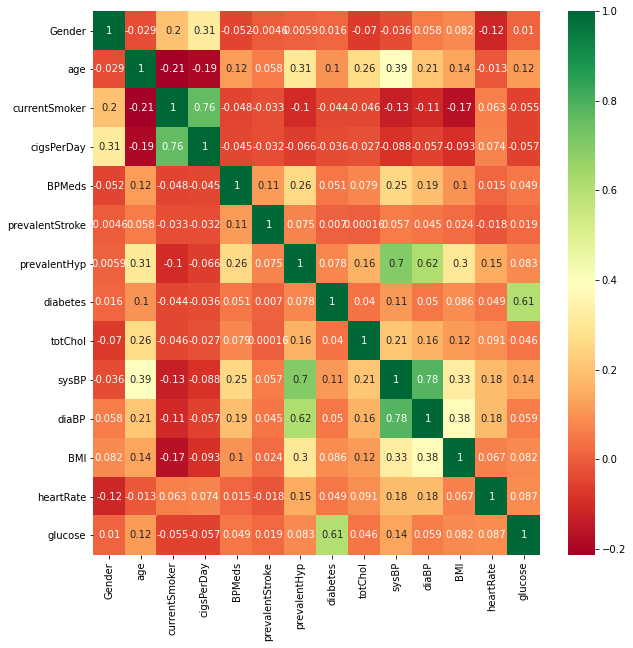

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(X.corr(),annot=True,cmap='RdYlGn')

#### from the above heatmap we can see that most of them are independent of each other and some are highly correlated like current smoker and cigs per day, sysBp , diaBP & Prevslent Hypertension , Guucose and diabetes etc.
 

#### There are some negatively correlated are also there like age with currentssmoker and cig per day, BMI and current smoker etc.

#### from the above table we can see that mean values are different ranges for each variables which means we need to do scaling

In [46]:
X.describe().transpose()

count        mean        std     min       25%    50%  \
Gender           4240.0    0.429245   0.495027    0.00    0.0000    0.0   
age              4240.0   49.580189   8.572942   32.00   42.0000   49.0   
currentSmoker    4240.0    0.494104   0.500024    0.00    0.0000    0.0   
cigsPerDay       4240.0    8.944340  11.904777    0.00    0.0000    0.0   
BPMeds           4240.0    0.029245   0.168513    0.00    0.0000    0.0   
prevalentStroke  4240.0    0.005896   0.076569    0.00    0.0000    0.0   
prevalentHyp     4240.0    0.310613   0.462799    0.00    0.0000    0.0   
diabetes         4240.0    0.025708   0.158280    0.00    0.0000    0.0   
totChol          4240.0  236.667689  44.328480  107.00  206.0000  234.0   
sysBP            4240.0  132.354599  22.033300   83.50  117.0000  128.0   
diaBP            4240.0   82.897759  11.910394   48.00   75.0000   82.0   
BMI              4240.0   25.799005   4.070775   15.54   23.0775   25.4   
heartRate        4240.0   75.878774  12.023937   44.00   68.0000   75.0   
glucose          4240.0   81.600943  22.860340   40.00   72.0000   78.0   

                      75%    max  
Gender             1.0000    1.0  
age               56.0000   70.0  
currentSmoker      1.0000    1.0  
cigsPerDay        20.0000   70.0  
BPMeds             0.0000    1.0  
prevalentStroke    0.0000    1.0  
prevalentHyp       1.0000    1.0  
diabetes           0.0000    1.0  
totChol          262.0000  696.0  
sysBP            144.0000  295.0  
diaBP             90.0000  142.5  
BMI               28.0325   56.8  
heartRate         83.0000  143.0  
glucose           85.0000  394.0

In [51]:
#shuffle the dataset for proper sampling

dflog = dflog.sample(frac = 1, random_state=1)

We are using "MinMaxScaler" to scale our data. It means that our values are centered around mean 

In [52]:

from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
X_scaled = pd.DataFrame(sc.fit_transform(X),columns = X.columns)
X_scaled.head()

Gender       age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     0.0  0.921053            0.0    0.000000     0.0              0.0   
1     0.0  0.368421            1.0    0.428571     0.0              0.0   
2     1.0  0.342105            1.0    0.357143     0.0              0.0   
3     1.0  0.684211            1.0    0.285714     0.0              0.0   
4     1.0  0.789474            1.0    0.285714     0.0              0.0   

   prevalentHyp  diabetes   totChol     sysBP     diaBP       BMI  heartRate  \
0           0.0       0.0  0.196944  0.130024  0.264550  0.299321   0.464646   
1           0.0       0.0  0.190153  0.111111  0.222222  0.142026   0.222222   
2           0.0       0.0  0.307301  0.191489  0.349206  0.300533   0.252525   
3           0.0       0.0  0.169779  0.125296  0.338624  0.194135   0.343434   
4           0.0       0.0  0.327674  0.115839  0.264550  0.129181   0.161616   

    glucose  
0  0.064972  
1  0.107345  
2  0.220339  
3  0.107345  
4  0.112994

In [53]:
#Do k-fold cross validation using Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

cross_val_score(LogisticRegression(),X_scaled,y,cv=4).mean()

0.852122641509434

#### Predictive modelling
Once our data is scaled, we will split it into 'Training' and 'Testing' data.
80-20 is the ideal split range. Which means 75% data will be in training and 25% in testing.
Once this is done, we can start prediction.

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,random_state=0,test_size=0.25)
X_test.head()

Gender       age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
1465     1.0  0.078947            0.0    0.000000     0.0              0.0   
302      0.0  0.605263            1.0    0.128571     0.0              0.0   
87       0.0  0.842105            0.0    0.000000     0.0              0.0   
843      1.0  0.526316            1.0    0.285714     0.0              0.0   
1431     1.0  0.421053            1.0    0.285714     0.0              0.0   

      prevalentHyp  diabetes   totChol     sysBP     diaBP       BMI  \
1465           0.0       0.0  0.310696  0.115839  0.253968  0.178623   
302            0.0       0.0  0.308998  0.271868  0.375661  0.229035   
87             1.0       0.0  0.227504  0.286052  0.380952  0.373000   
843            1.0       0.0  0.298812  0.290780  0.328042  0.353369   
1431           0.0       0.0  0.234295  0.163121  0.264550  0.152690   

      heartRate   glucose  
1465   0.111111  0.124294  
302    0.323232  0.101695  
87     0.363636  0.073446  
843    0.282828  0.107345  
1431   0.313131  0.175141

In [58]:
#train the model on the training set
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [59]:
#Test accuracy
model.score(X_test,y_test)

0.8575471698113207

In [60]:
#Let's look at some other scores as well
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       904
           1       0.73      0.05      0.10       156

    accuracy                           0.86      1060
   macro avg       0.79      0.52      0.51      1060
weighted avg       0.84      0.86      0.80      1060



In [61]:
# my precision is .85 for the class 0 ,1.00 recall which means 100% where correctly classified in class 0 , 0.92 as F1 score harmonic mean of the precision and recall.
# support is 890 which means the frequency for th class 0.

In [62]:
# like wise for class 1 precision value is .82  , recall is .05 , f1 is .10 , support is 170

In [63]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test,y_pred) # this accuracy for my data.

0.8575471698113207

In [64]:
print(confusion_matrix(y_test,y_pred))

[[901   3]
 [148   8]]


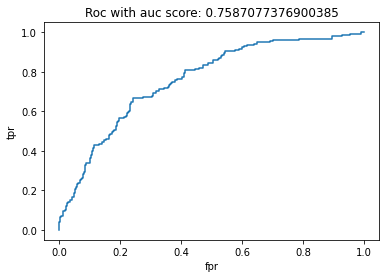

In [65]:
#ROC is the curve traced by the co-ordinates (FPR,TPR) 
#for different probability threshold values
#AUC is the area under the ROC curve

from sklearn.metrics import roc_auc_score, roc_curve
#taking the second column for correct auc score
y_pred_prob = model.predict_proba(X_test)[:,1] 

#second column represents the '-' class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

#plot the curve with auc score
import  matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Roc with auc score: {}'.format(roc_auc_score(y_test,y_pred_prob)))
plt.show()

#### The AuC score is .07587 which means the score is near 0.5. The auc is more than half (0.5) we can still use the logistic regression for this data even when the data is imbalanced. So maybe by doing underfitting we can try to achieve a better AUC .